# [Data Science:](DataScience.ipynb) Fitting

## Goal

- adjust a function to match data

## Variables
### scalar
- position $x$
### vector
- location $\vec{v} = (x,y,z)$
### matrix
- locations $\mathbf{M} = \left[\begin{matrix}x_0 & x_1 & \ldots\\ y_0 & y_1 & \ldots\\ z_0 & z_1 & \ldots\end{matrix}\right]$
- transpose
    - $\left[\begin{matrix}1&2\\3&4\\5&6\end{matrix}\right]^T$ = $\left[\begin{matrix}1&3&5\\2&4&6\end{matrix}\right]$
- multiplication
    - $\left[\begin{matrix}a&b\\c&d\end{matrix}\right]
\left[\begin{matrix}e&f\\g&h\end{matrix}\right]
= \left[\begin{matrix}ae&bg\\cf&dh\end{matrix}\right]$
- identity
    - $I = \left[\begin{matrix}1&0&\ldots\\0&1&\ldots\\\vdots&\vdots&\ddots\end{matrix}\right]$
- inverse
    - $M^{-1}M = I$
- pseudoinverse
    - used for matrices that can't be exactly inverted
    - important for fitting, which can be over- or under-determined
- determinant
    - $|M|$
    - measures how much a matrix scales space
    - found with a recursive expansion

## Functions
### linear
- $y = ax$
### affine
- $y = ax+b$
### polynomial
- 1D: $f(x) = c_0+c_1x+c_2x^2+\ldots$
- 2D: $f(x,y) = c_{00}+c_{10}x+c_{01}y+c_{11}xy+c_{20}x^2+c_{02}y^2+\ldots$
- $\ldots$
### nonlinear
- trigonometric
    - $\sum_i a_i \sin(b_i x + c_i)$
- radial basis functions
    - $\sum_i a_i f(r_i) = \sum_i a_i f(|\vec{x}-\vec{x_i}|)$
- Gaussian mixture models
    - $\sum_i a_i\frac{1}{\sqrt{2\pi\sigma_i^2}}e^{(x-x_i)^2/2\sigma_i^2}$
- deep neural networks
    - $f\left(\sum_j w_{ij}~g\left(\sum_k w_{jk}x_k+b_j\right)+b_i\right) \ldots$
- ...
### sum

- $\sum_{i=1}^N f(x_i)$
    - add up the values of the function $f$ evaluted at the points $x_1, x_2, \ldots, x_i, \ldots, x_N$

### integral

- $\int_{x_\min}^{x_\max} f(x)~dx$
    - limit of sum for infinitesimal slices $dx$

### derivative

- first derivative
    - $\cfrac{df}{dx}$
    - infinitesimal limit of the ratio
    - measures slope
- second derivative
    - $\cfrac{d^2f}{dx^2}$
    - measures curvature

### distance

- Euclidean $|\vec{x}-\vec{y}| = \sqrt{\sum_{d=1}^D (x_d-y_d)^2}$
- can use other metrics

### Vandermonde matrix

- data $x_i$, functions $f_n(x_i)$
- $\mathbf{M} =
\left[\begin{matrix}
f_1(x_1) & f_2(x_1) & \ldots \\
f_1(x_2) & f_2(x_2) & \ldots \\
\vdots & \vdots & \ddots
\end{matrix}\right]
$

In [6]:
conda install -c conda-forge ipympl


Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.5.0
  latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.7.0



## Package Plan ##

  environment location: /Users/ortakhesap/anaconda3

  added / updated specs:
    - ipympl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |       7_kmp_llvm           8 KB  conda-forge
    blas-1.0                   |              mkl           6 KB
    brotli-1.2.0               |       hf139dec_1          20 KB  conda-forge
    brotli-bin-1.2.0           |       h8616949_1          18 KB  conda-forge
    ca-certificates-2025.11.12 |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2

brotli-1.2.0         | 20 KB     | ##############################        |  81% 


















mkl-2023.2.0         | 113.5 MB  | ##                                    |   6% 



















brotli-1.2.0         | 20 KB     | ##################################### | 100% 

















jupyterlab_widgets-3 | 212 KB    | ##################################### | 100% 

















jupyterlab_widgets-3 | 212 KB    | ##################################### | 100% 






matplotlib-base-3.5. | 7.5 MB    | ##################                    |  49% 




















_openmp_mutex-4.5    | 8 KB      | ##################################### | 100% 




















mkl-2023.2.0         | 113.5 MB  | ##1                                   |   6% 






matplotlib-base-3.5. | 7.5 MB    | ##################9                   |  51% 





















mkl-2023.2.0         | 113.5 MB  | ##2                                   |   6% 






matplotlib-base-3.5. | 7.5 MB    | #####

Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


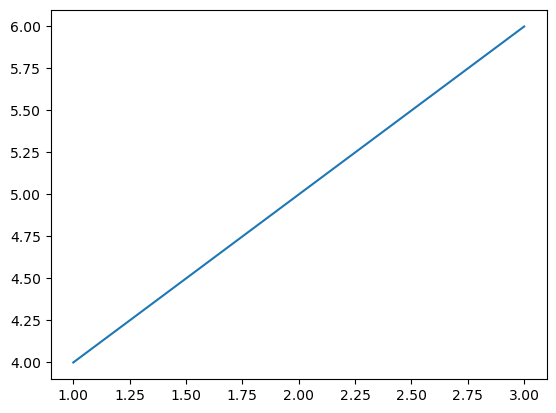

In [4]:
import matplotlib.pyplot as plt
plt.plot([1,2,3],[4,5,6])
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("XAU_1d_data.csv", sep=";")
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year


## Errors

### model estimation

- deviation in model parameters 

### model mismatch

- deviation in model architecture

### bias-variance tradeoff

- tradeoff between better estimates of fewer models parameters and better models with more parameters

## Fitting

- *residual*: difference $\epsilon_i$ between data value $y_i$ and fit $f(x_i)$
    - $\epsilon_i = y_i-f(x_i)$
- *loss*: sum of residuals
    - least squares ($L^2$ norm): sum of squares
        - $\sum_i \epsilon_i^2$
        - most common
    - $L^1$ norm: sum of absolute values
        - $\sum_i |\epsilon_i|$
        - less sensitive to outliers
 
### linear least squares

- used for models where the coefficients appear linearly
- *algorithm*: [Singular Value Decomposition (SVD)](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)

#### polynomial

##### 1D

- *routine*: [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
    - find the least-squares fit for a 1D polynomial
- *function*: $y=c_0+c_1x+c_2x^2$

data generation coefficients: [-0.3, 1, 0.5]
first-order fit coefficients: [0.402 0.711]
second-order fit coefficients: [-0.308  1.006  0.507]


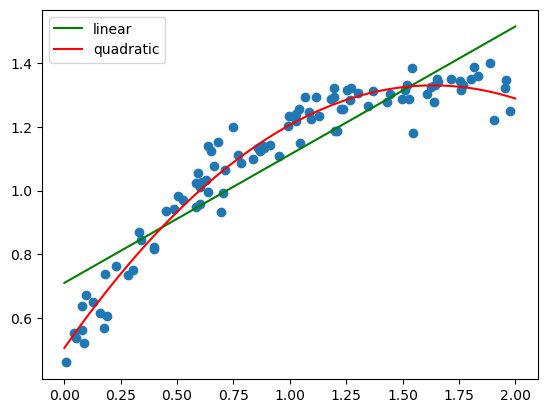

In [6]:
##RANDOM GENERATED


import numpy as np
import matplotlib.pyplot as plt
xmin = 0
xmax = 2
noise = 0.05
npts = 100
np.set_printoptions(precision=3)
np.random.seed(10)
c = [-.3,1,0.5]
print(f"data generation coefficients: {c}")
x = xmin+(xmax-xmin)*np.random.rand(npts) # generate random x
y = c[2]+c[1]*x+c[0]*x*x+np.random.normal(0,noise,npts) # evaluate polynomial at x and add noise
coeff1 = np.polyfit(x,y,1) # fit first-order polynomial
coeff2 = np.polyfit(x,y,2) # fit second-order polynomial
xfit = np.linspace(xmin,xmax,npts)
pfit1 = np.poly1d(coeff1)
yfit1 = pfit1(xfit) # evaluate first-order fit
print(f"first-order fit coefficients: {coeff1}")
pfit2 = np.poly1d(coeff2)
yfit2 = pfit2(xfit) # evaluate second-order fit
print(f"second-order fit coefficients: {coeff2}")
plt.figure()
plt.plot(x,y,'o')
plt.plot(xfit,yfit1,'g-',label='linear')
plt.plot(xfit,yfit2,'r-',label='quadratic')
plt.legend()
plt.show()

In [7]:
##############################################################################################################

## MY DATA PLOTS

In [8]:
df.columns #Kod icerisinde kullanmak icin data'daki collumnn isimleri


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Year'], dtype='object')

In [9]:
import pandas as pd
df = pd.read_csv('XAU_1d_data.csv', sep=';') #data okunur ; ile ayrilir


Linear fit coefficients: [3.018e-01 5.382e+02]
Quadratic fit coefficients: [1.475e-05 2.223e-01 6.096e+02]


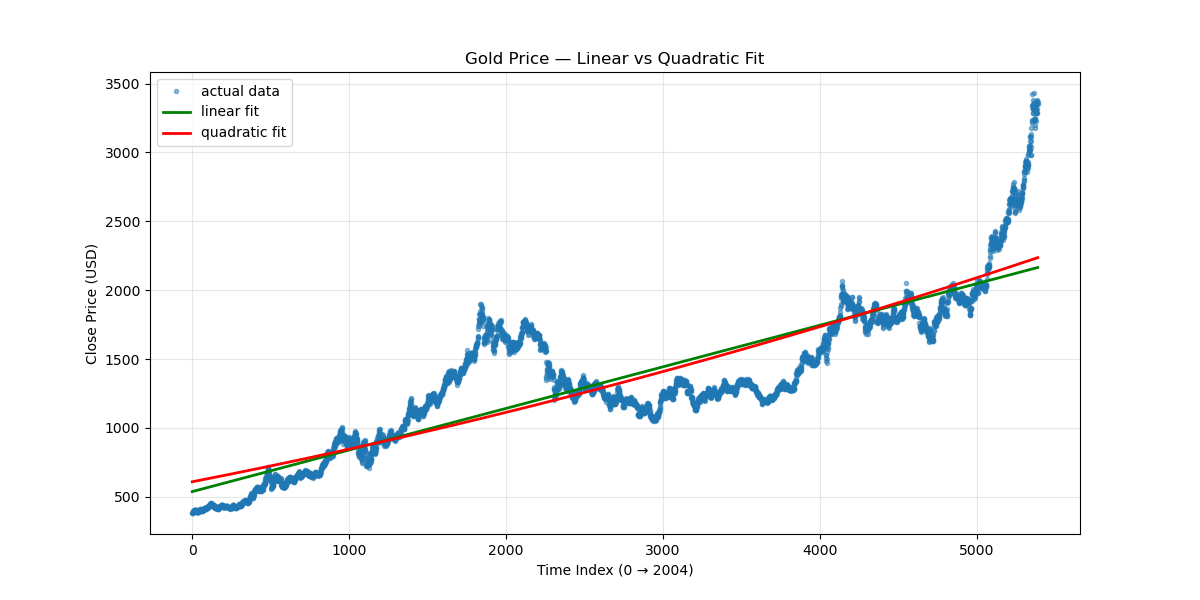

In [22]:
df = df.sort_values('Date') #x zaman indeksi
df = df.dropna(subset=['Close']) #close degeri eksikse kaldirir
y = df['Close'].values
x = np.arange(len(y)) # 0,1,2,3...

# 1. DERECE LINEAR
coeff1 = np.polyfit(x, y, 1)
fit1 = np.poly1d(coeff1)
yfit1 = fit1(x)

# 2. DERECE QUADRATIC
coeff2 = np.polyfit(x, y, 2)
fit2 = np.poly1d(coeff2)
yfit2 = fit2(x)   # Artık fit2 tanımlı

print("Linear fit coefficients:", coeff1)
print("Quadratic fit coefficients:", coeff2)



# Plotting

plt.figure(figsize=(12,6)) #12ye 6 grafik alani olusturulur

plt.plot(x, y, 'o', markersize=3, label='actual data', alpha=0.5)  # scatterlari noktalari grafik uzerinde cizer
plt.plot(x, yfit1, 'g-', linewidth=2, label='linear fit') #linear regresyon cizgisi ve ozellikleri ve labeli
plt.plot(x, yfit2, 'r-', linewidth=2, label='quadratic fit') #kuadratik modelin cizgisi ve ozellikleri ve labeli

plt.title("Gold Price — Linear vs Quadratic Fit") #grafik basligi eklenir

#axislere yazilacak basliklar
plt.xlabel("Time Index (0 → 2004)")
plt.ylabel("Close Price (USD)")

plt.legend()#grafik lejanti 

#grid ekler ve plotu yazdirir
plt.grid(True, alpha=0.3)
plt.show()



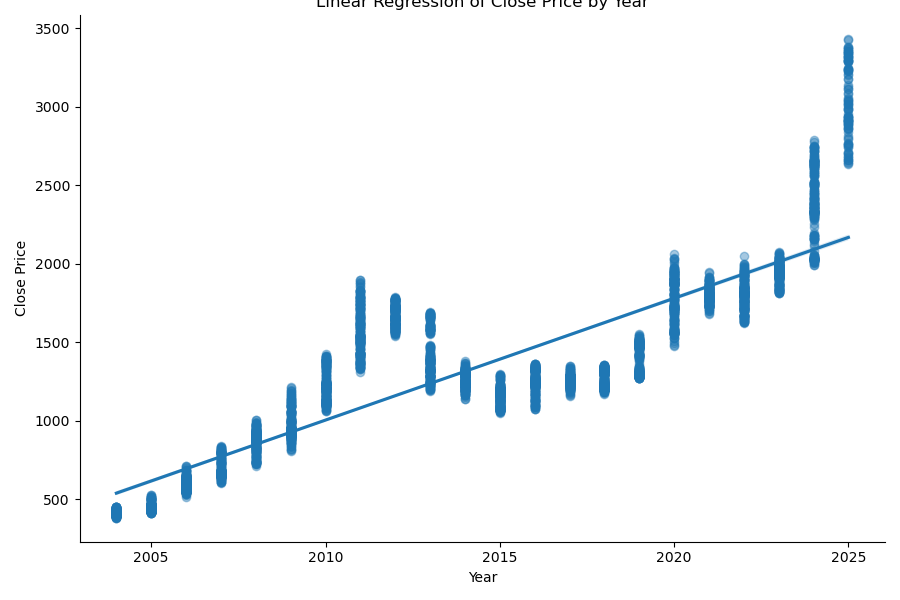

In [23]:
# Date kolonunu datetime yap (pandas)
df["Date"] = pd.to_datetime(df["Date"])

# Tarihleri tam tarihten yıla indirge
df["Year"] = df["Date"].dt.year


#seabornda linear regresyon grafigi cizme kodu, kendi datamizi yerlestirdik
sns.lmplot(
    data=df, #dataframe
    x="Year", #bagimsiz degisken yil
    y="Close",#bagimli degisken fiyat
    height=6,
    aspect=1.5,#grafik boyutlari
    scatter_kws={'alpha':0.4} #scatter noktalari yarisaydam
)


plt.title("Linear Regression of Close Price by Year") #grafik title
plt.xlabel("Year") # x ekseni title
plt.ylabel("Close Price") #y ekseni title
plt.show()# grafik cizdirilir


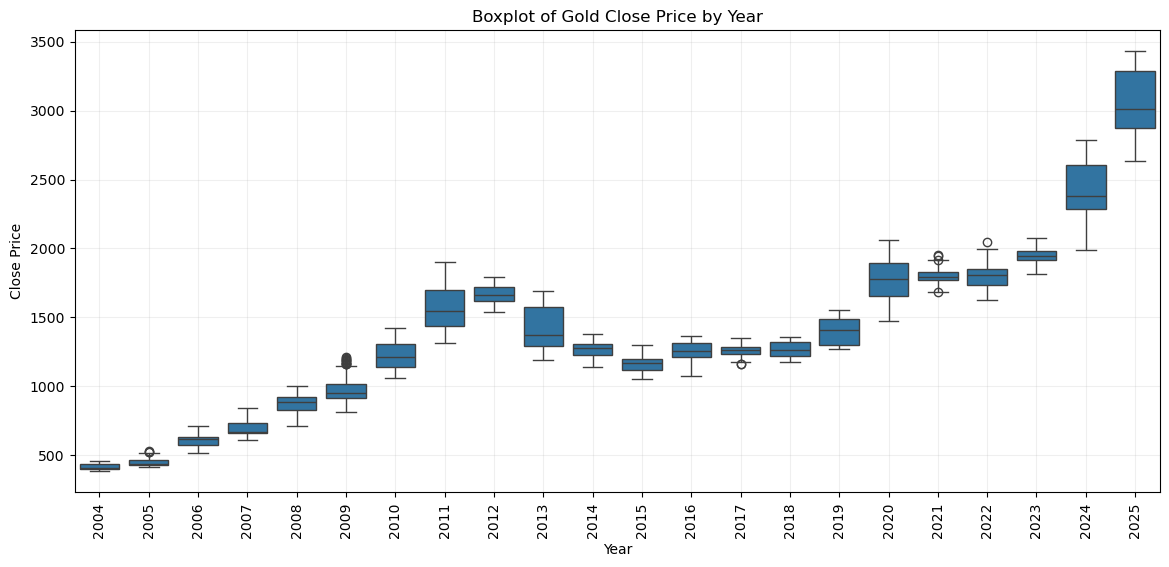

In [12]:
df["Date"] = pd.to_datetime(df["Date"]) #tarih kolonunu stringden pandasdaki datetime a donusturme
df["Year"] = df["Date"].dt.year #tam tarih senelere indirgenir

plt.figure(figsize=(14,6)) #grafik penceresi olusturulur
sns.boxplot(data=df, x="Year", y="Close")#boxplotlar cizdirilir seaborndan

#grafik basligi ve eksen isimleri
plt.title("Boxplot of Gold Close Price by Year")
plt.xlabel("Year")
plt.ylabel("Close Price")

#grafik ozellestirme (yillar sigdirilsin diye capraz yazilir grid olusturulur grafik cikartilir)
plt.xticks(rotation=90)
plt.grid(True, alpha=0.2)
plt.show()



In [13]:
######################################################################################################

##### 2D

- *routine*: [lstsq](https://numpy.org/doc/2.3/reference/generated/numpy.linalg.lstsq.html)
    - find the least-squares fit for a linear matrix equation
        - observations = Vandermonde matrix * fit coefficients
- *function*: $z = c_0+c_1x+c_2y+c_3xy+c_4x^2+c_5y^2+\ldots$

data generation coefficients: [1, -1, 0.5, -1.5, 2, 5]
fit coefficients: [ 1.004 -0.999  0.504 -1.498  1.998  4.998]


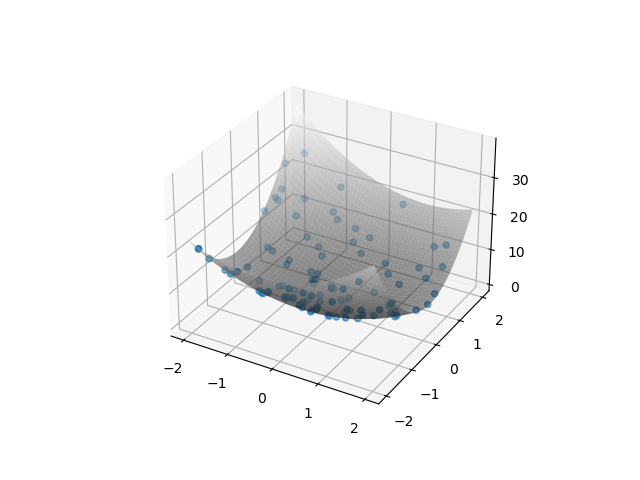

In [17]:
%matplotlib ipympl 
#matploblib arayuzu etkinlestirilir
import numpy as np #kutuphane importu
import matplotlib.pyplot as plt #kutuphane importu

#x ve y için rastgele noktalar üretirken kullanılacak minimum  –2, maksimum 2 deger alabilsin
xmin = ymin = -2 
xmax = ymax = 2

#modele eklenecek rastgele dagilim 0.05 sapma oranina ayarlanir noise ile, npts ile uretilecek ornek sayisi 100
noise = 0.05
npts = 100


np.set_printoptions(precision=3) #numpy dizileri(x,y,z,M,cfit) ekrana yazdirilirken sadece 3 ondalik basamakli olsun

np.random.seed(10)#data olusturma, tekrarlanabilir bir rastgelelik dizisi


c = [1,-1,0.5,-1.5,2,5]#polinomun katsayilari belirlendi, biz belirledik data olmadigi icin burada


print(f"data generation coefficients: {c}") #datayi olusturdugumuz coefficientlar print edilir

#0-100 arasi rastgele sayi uretilip -2 den 2ye olceklendirilir sadelestirilir
x = xmin+(xmax-xmin)*np.random.rand(npts) # generate random x
y = ymin+(ymax-ymin)*np.random.rand(npts) # generate random y

#polinomdaki her noktaya gurultu eklenir ki daha gercekci olsun
z = c[0]+c[1]*x+c[2]*y+c[3]*x*y+c[4]*x*x+c[5]*y*y+np.random.normal(0,noise,npts) # evaluate polynomial and add noise

#vandermendo matrisi olusturlur, x y degerlerinden z degerini tahmin etmek icin (z= gercek polinom datasi + gurultu)
M = np.c_[np.ones(npts),x,y,x*y,x*x,y*y] 

# En küçük kareler yöntemiyle (least squares) yüzey katsayılarını hesapla
cfit, residuals, rank, values = np.linalg.lstsq(M, z, rcond=None) 

#yazdir
print(f"fit coefficients: {cfit}")

# Yeni bir figür oluştur
fig = plt.figure()
fig.canvas.header_visible = False

# 3B eksen ekle
ax = fig.add_subplot(projection='3d') # add 3D axes

# Verilerin nokta (scatter) grafiğini çiz
ax.scatter(x,y,z)

# Fit yüzeyini oluşturmak için x ve y aralıklarını belirle
xfit = np.linspace(xmin,xmax,npts)
yfit = np.linspace(ymin,ymax,npts)


Xfit,Yfit = np.meshgrid(xfit,yfit)
Zfit = cfit[0]+cfit[1]*Xfit+cfit[2]*Yfit+cfit[3]*Xfit*Yfit+cfit[4]*Xfit*Xfit+cfit[5]*Yfit*Yfit # evaluate fit surface
ax.plot_surface(Xfit,Yfit,Zfit,cmap='gray',alpha=0.5) # plot fit surface
plt.show()

In [15]:
df["Date"] = pd.to_datetime(df["Date"])
df["DateNum"] = df["Date"].map(pd.Timestamp.toordinal)  # convert to integer

x = df["DateNum"].values
y = df["Volume"].values
z_real = df["Close"].values

M = np.c_[np.ones(len(df)), x, y, x*y, x*x, y*y]
cfit, residuals, rank, values = np.linalg.lstsq(M, z_real, rcond=None)

print("Fit coefficients:", cfit)


z_pred = M @ cfit
df["PredictedClose"] = z_pred

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

absolute_error = np.abs(z_real - z_pred)
percentage_error = absolute_error / z_real * 100

rmse = np.sqrt(mean_squared_error(z_real, z_pred))
r2 = r2_score(z_real, z_pred)

print("RMSE:", rmse)
print("R²:", r2)


plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Close"], label="Actual Close")
plt.plot(df["Date"], df["PredictedClose"], label="Predicted Close")
plt.legend()
plt.title("Actual vs Predicted Close Price")
plt.show()


df["Residual"] = df["Close"] - df["PredictedClose"]

plt.figure(figsize=(14,4))
plt.plot(df["Date"], df["Residual"])
plt.title("Residuals (Actual - Predicted)")
plt.axhline(0, color="black", linewidth=1)
plt.show()


Fit coefficients: [-4.582e-07 -1.689e-01 -4.242e-02  5.979e-08  2.318e-07 -5.178e-10]


ModuleNotFoundError: No module named 'sklearn'

#### the problems with polynomials
- can't fit sharp features
- divergences

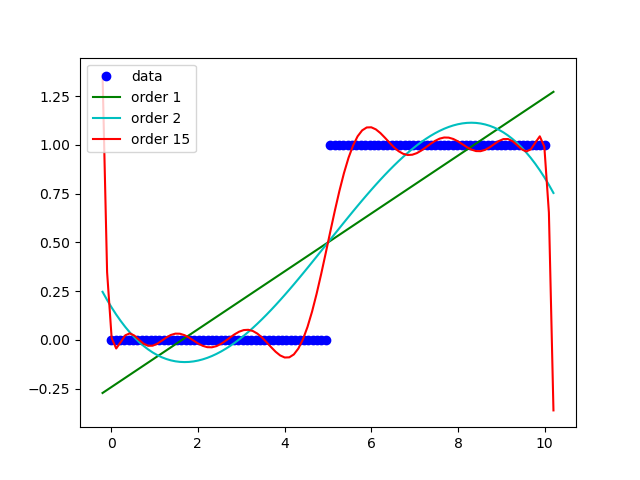

In [3]:
import numpy as np
import matplotlib.pyplot as plt
xmin = 0
xmax = 10
npts = 100
x = np.linspace(xmin,xmax,npts)
y = np.heaviside(-1+2*(x-xmin)/(xmax-xmin),0.5) # generate step to fit
xplot = np.linspace(xmin-0.2,xmax+0.2,npts)
coeff1 = np.polyfit(x,y,1) # fit and evaluate order 1 polynomial
pfit1 = np.poly1d(coeff1)
yfit1 = pfit1(xplot)
coeff2 = np.polyfit(x,y,4) # fit and evaluate order 2 polynomial
pfit2 = np.poly1d(coeff2)
yfit2 = pfit2(xplot)
coeff15 = np.polyfit(x,y,15) # fit and evaluate order 15 polynomial
pfit15 = np.poly1d(coeff15)
yfit15 = pfit15(xplot)
fig = plt.figure()
fig.canvas.header_visible = False
plt.plot(x,y,'bo',label='data')
plt.plot(xplot,yfit1,'g-',label='order 1')
plt.plot(xplot,yfit2,'c-',label='order 2')
plt.plot(xplot,yfit15,'r-',label='order 15')
plt.legend()
plt.show()

#### radial basis function (RBF)

- expand with a sum over functions that depend on distance from anchor points
    - $f(\vec{x}) = \sum_i c_i f(r_i) = \sum_i c_i f(|\vec{x}-\vec{x_i}|)$
- increases number of terms rather than their divergence
- many possible basis functions, e.g. $r^3$
- *function*: $y = \sum_i c_i |\vec{x}-\vec{x}_i|^3$

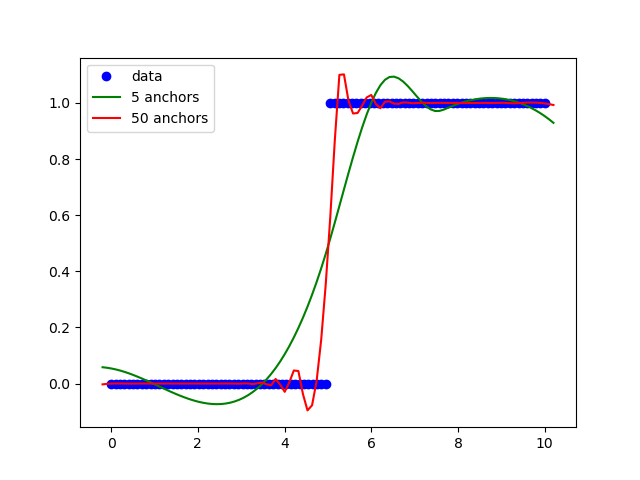

In [4]:
import numpy as np
import matplotlib.pyplot as plt
xmin = 0
xmax = 10
npts = 100
np.random.seed(10)
x = np.linspace(xmin,xmax,npts)
y = np.heaviside(-1+2*(x-xmin)/(xmax-xmin),0.5) # generate step to fit
xplot = np.linspace(xmin-0.2,xmax+0.2,npts)
ncenters = 5
indices = np.random.uniform(low=0,high=len(x),size=ncenters).astype(int) # choose 5 random RBF centers
centers = x[indices]
M = np.abs(np.outer(x,np.ones(ncenters)) # construct matrix of basis terms
   -np.outer(np.ones(npts),centers))**3
cfit5,residuals,rank,values = np.linalg.lstsq(M,y) # do SVD fit
yfit5 = (np.abs(np.outer(xplot,np.ones(ncenters))-np.outer(np.ones(npts),centers))**3)@cfit5 # evaluate fit
ncenters = 50
indices = np.random.uniform(low=0,high=len(x),size=ncenters).astype(int) # choose 50 random RBF centers
centers = x[indices]
M = np.abs(np.outer(x,np.ones(ncenters)) # construct matrix of basis terms
   -np.outer(np.ones(npts),centers))**3
cfit50,residuals,rank,values = np.linalg.lstsq(M,y) # do SVD fit
yfit50 = (np.abs(np.outer(xplot,np.ones(ncenters))-np.outer(np.ones(npts),centers))**3)@cfit50 # evaluate fit
fig = plt.figure()
fig.canvas.header_visible = False
plt.plot(x,y,'bo',label='data')
plt.plot(xplot,yfit5,'g-',label='5 anchors')
plt.plot(xplot,yfit50,'r-',label='50 anchors')
plt.legend()
plt.show()

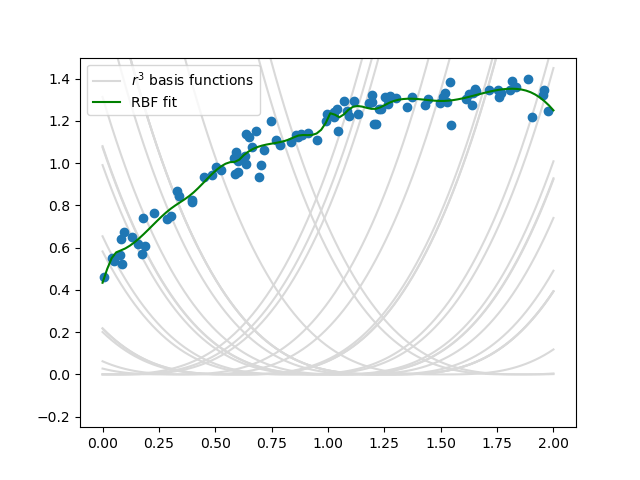

In [5]:
import numpy as np
import matplotlib.pyplot as plt
xmin = 0
xmax = 2
noise = 0.05
npts = 100
ncenters = 20
c = [-.3,1,0.5]
np.random.seed(10)
x = xmin+(xmax-xmin)*np.random.rand(npts) # generate random x
y = c[2]+c[1]*x+c[0]*x*x+np.random.normal(0,noise,npts) # evaluate polynomial at x and add noise
indices = np.random.uniform(low=0,high=len(x),size=ncenters).astype(int) # choose random RBF centers from data
centers = x[indices]
M = np.abs(np.outer(x,np.ones(ncenters)) # construct matrix of basis terms
   -np.outer(np.ones(npts),centers))**3
coeff,residuals,rank,values = np.linalg.lstsq(M,y) # do SVD fit
xfit = np.linspace(xmin,xmax,npts)
yfit = (np.abs(np.outer(xfit,np.ones(ncenters))-np.outer(np.ones(npts),centers))**3)@coeff # evaluate fit
fig = plt.figure()
fig.canvas.header_visible = False
plt.plot(xfit,np.abs(xfit-centers[0])**3,color=(0.85,0.85,0.85),label='$r^3$ basis functions')
for i in range(ncenters):
    plt.plot(xfit,np.abs(xfit-centers[i])**3,color=(0.85,0.85,0.85))
plt.plot(x,y,'o')
plt.plot(xfit,yfit,'g-',label='RBF fit')
plt.ylim(-0.25,1.5)
plt.legend()
plt.show()

### nonlinear least squares

- used for models where the coeffients appear nonlinearly
- requires iterative solution
- *routine*: [least_squares](https://docs.scipy.org/doc//scipy-1.16.2/reference/generated/scipy.optimize.least_squares.html)
- *algorithm*: Levenberg-Marquardt, trust region
- *function:*: $y=c_0*(c_1+{\tanh}(c_2*(x-c_3)))$

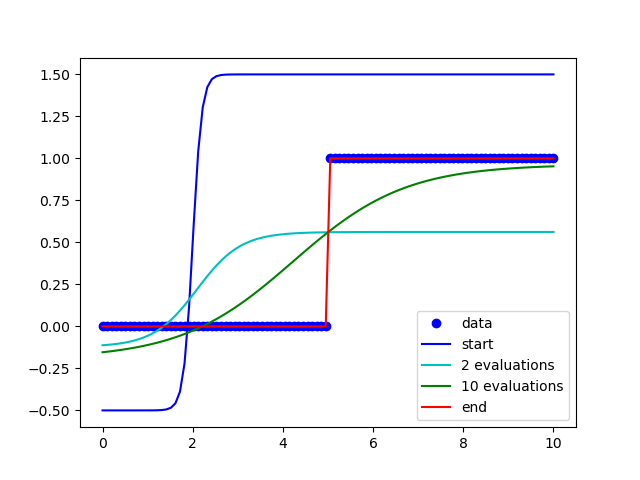

In [6]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
#
# generate step function data to fit
#
xmin = 0
xmax = 10
npts = 100
x = np.linspace(xmin,xmax,npts)
y = np.heaviside(-1+2*(x-xmin)/(xmax-xmin),0.5)
coeff = np.array([1,0.5,5,2])
#
# define tanh function and residuals
#
def f(coeff,x):
    return (coeff[0]*(coeff[1]+np.tanh(coeff[2]*(x-coeff[3]))))
def residuals(coeff,x,y):
    return f(coeff,x)-y
#
# fit
#
result2 = least_squares(residuals,coeff,args=(x,y),max_nfev=2)
result10 = least_squares(residuals,coeff,args=(x,y),max_nfev=10)
resultend = least_squares(residuals,coeff,args=(x,y))
#
# plot
#
fig = plt.figure()
fig.canvas.header_visible = False
plt.plot(x,y,'bo',label='data')
plt.plot(x,f(coeff,x),'b-',label='start')
plt.plot(x,f(result2.x,x),'c-',label='2 evaluations')
plt.plot(x,f(result10.x,x),'g-',label='10 evaluations')
plt.plot(x,f(resultend.x,x),'r-',label='end')
plt.legend()
plt.show()


## Overfitting
- fitting noise vs data

### cross-validation
- fit on training data, evaluate on testing data, find loss function minimum to determine hyperparameters

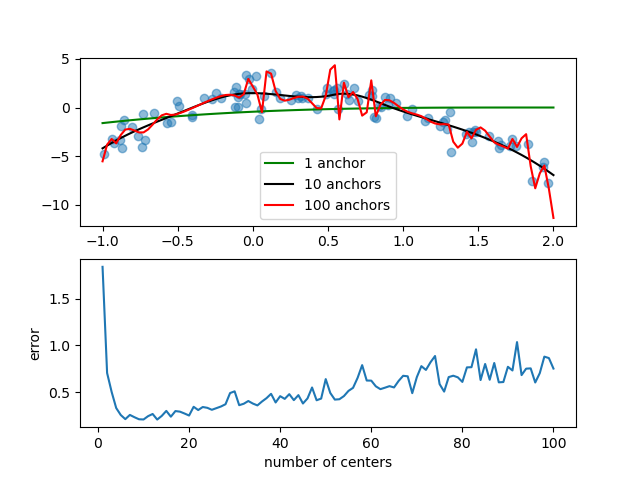

In [7]:
import numpy as np
import matplotlib.pyplot as plt
xmin = -1
xmax = 2
noise = 1
npts = 100
c = [-3,2,1]
np.random.seed(10)
#
# generate training data
#
x = xmin+(xmax-xmin)*np.random.rand(npts)
y = c[2]+c[1]*x+c[0]*x*x+np.random.normal(0,noise,npts)
#
# generate testing data
#
xtest = xmin+(xmax-xmin)*np.random.rand(npts)
ytest = c[2]+c[1]*xtest+c[0]*xtest*xtest
#
# loop over number of centers, fit, and save
#
errors = []
coeffs = []
centers = []
ncenters = np.arange(1,101,1)
for ncenter in ncenters:
    indices = np.random.uniform(low=0,high=len(x),size=ncenter).astype(int)
    center = x[indices]
    M = np.abs(np.outer(x,np.ones(ncenter))
       -np.outer(np.ones(npts),center))**3
    coeff,residuals,rank,values = np.linalg.lstsq(M,y)
    yfit = (np.abs(np.outer(xtest,np.ones(ncenter))-np.outer(np.ones(npts),center))**3)@coeff
    errors.append(np.mean(np.abs(yfit-ytest)))
    coeffs.append(coeff)
    centers.append(center)
#
# plot data, fits, and errors
#
fig,axs = plt.subplots(2,1)
fig.canvas.header_visible = False
axs[0].plot(x,y,'o',alpha=0.5)
xplot = np.linspace(xmin,xmax,npts)
n = 1
yplot = (np.abs(np.outer(xplot,np.ones(n))-
    np.outer(np.ones(npts),centers[n-1]))**3)@coeffs[n-1]
axs[0].plot(xplot,yplot,'g-',label='1 anchor')
n = 10
yplot = (np.abs(np.outer(xplot,np.ones(n))-
    np.outer(np.ones(npts),centers[n-1]))**3)@coeffs[n-1]
axs[0].plot(xplot,yplot,'k-',label='10 anchors')
n = 100
yplot = (np.abs(np.outer(xplot,np.ones(n))-
    np.outer(np.ones(npts),centers[n-1]))**3)@coeffs[n-1]
axs[0].plot(xplot,yplot,'r-',label='100 anchors')
axs[0].legend()
axs[1].plot(ncenters,errors)
axs[1].set_ylabel('error')
axs[1].set_xlabel('number of centers')
plt.show()

### regularization
- constrain fits with prior beliefs
- example: minimize error plus a penalty term for the magnitude of the coefficients (called ridge regression, Tikhonov regularization, weight decay)
    - for linear model coefficients $\vec{c}$, Vandermonde matrix $M$, observations $\vec{y}$, regularization strength $\lambda$
    - need to minimize $|M\vec{c}-\vec{y}|^2+\lambda|\vec{c}|^2$
    - this is solved by $(M^TM+\lambda I)\vec{c} = M^T\vec{y}$
        - therefore $\vec{c} = (M^TM+\lambda I)^{-1}M^T\vec{y}$

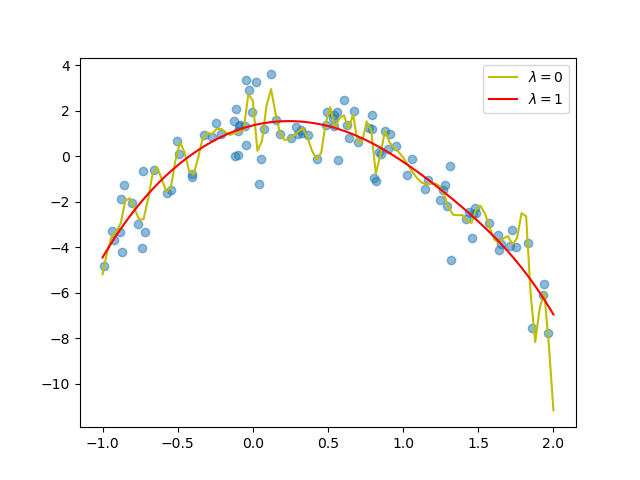

In [8]:
import numpy as np
import matplotlib.pyplot as plt
xmin = -1
xmax = 2
noise = 1
npts = 100
c = [-3,2,1]
np.random.seed(10)
#
# generate data
#
x = xmin+(xmax-xmin)*np.random.rand(npts)
y = c[2]+c[1]*x+c[0]*x*x+np.random.normal(0,noise,npts)
#
# generate Vandermonde matrix
#
ncenters = 100
indices = np.random.uniform(low=0,high=len(x),size=ncenters).astype(int)
centers = x[indices]
M = np.abs(np.outer(x,np.ones(ncenters))
   -np.outer(np.ones(npts),centers))**3
#
# invert matrices to find weight-regularized coefficients
#
Lambda = 1
left = (M.T)@M+Lambda*np.eye(ncenters)
right = (M.T)@y
coeff1 = np.linalg.pinv(left)@right
Lambda = 0
left = (M.T)@M+Lambda*np.eye(ncenters)
right = (M.T)@y
coeff0 = np.linalg.pinv(left)@right
#
# plot fits
#
xfit = np.linspace(xmin,xmax,npts)
yfit0 = (np.abs(np.outer(xfit,np.ones(ncenters))-np.outer(np.ones(npts),centers))**3)@coeff0
yfit1 = (np.abs(np.outer(xfit,np.ones(ncenters))-np.outer(np.ones(npts),centers))**3)@coeff1
plt.figure()
plt.plot(x,y,'o',alpha=0.5)
plt.plot(xfit,yfit0,'y-',label=r'$\lambda=0$')
plt.plot(xfit,yfit1,'r-',label=r'$\lambda=1$')
plt.legend()
plt.show()

### bootstrap
- drawing points randomly from a small data set to generate larger synthetic data sets
- seems like cheating, but has a solid statistical basis

## Assignment

- Fit a function to your data

## Review